# Reporte 3
###### Curso: Fundamentos de Macroeconomía (0651)
###### Nombre: Sebastián Daniel Gómez Farje
###### Código: 20200901
###### Fecha: 16/9/2022

## Parte 1: Reporte de Lectura

El artículo La Macroeconomía de la Cuarentena: Un modelo de dos sectores, de Waldo Mendoza, Luis Mancilla y Rafael Velarde, explora el impacto macroeconómico que la cuarentena tuvo en la economía.  Los autores buscan reproducir la dura caída de la economía con la llegada del Covid-19, pero a su vez la vigorosa recuperación en 2021 utilizando un modelo macroeconómico particular. Así, el texto ahonda en el tema de la macroeconomía antes, durante y después de la cuarentena, presentando a su vez el modelo del estudio. A continuación, se presentará el artículo, sus propuestas y la contribución que brinda al estudio de la economía peruana en pandemia.

La pregunta de investigación que los autores indirectamente presenta para su artículo es la siguiente: ¿Cómo se relacionaron los hechos macroeconómicos durante la cuarentena de los siguientes sectores de actividad económica: aquellos afectados directamente por la cuarentena y aquellos afectados tan solo indirectamente por el shock de demanda negativo? Para responder la pregunta de investigación, el documento selecciona como principal objetivo presentar un modelo macroeconómico inspirado en Blanchard (2021) que simula los hechos macroeconómicos ocurridos. Este modelo sigue la lógica keynesiana y analiza la relación entre los dos sectores mencionados en la pregunta de investigación. Con este fin, los autores primero presentan el modelo utilizado y luego los subsistemas dentro del modelo. Posteriormente, se simula los efectos de la cuarentena en ambos sectores, con especial énfasis en el periodo inicial (deterioro de la economía) y final del periodo analizado (recuperación post-pandemia).

El artículo cuenta tanto con fortalezas como con debilidades. Una posible debilidad del artículo es que la ecuación para determinar la demanda no incluye el factor de exportaciones e importaciones (i.e. X1 – M1 podría ser añadido a C1 + I1+ + G1 = D1). Es verdad que el documento no está teniendo en cuenta mucho más factores puramente económicos, ya que solo se concentra en factores de la cuarentena (i.e. el hecho de que un sector económico no pudo trabajar como lo hacía normalmente), pero es un factor importante al momento de formular la demanda y X1 – M1 es comúnmente incluido en la fórmula. Otra posible debilidad, aunque menor, es que la ayuda gráfica para las secciones 2.1 y 2.2. no es útil. El documento provee la explicación para el desplazamiento de las rectas del modelo para cada uno de sus subsistemas y, al finalizar cada explicación, ofrece una imagen gráfica para aportar a la explicación de cómo se relacionan las variables, su desplazamiento. No obstante, las imágenes para el subsistema de corto plazo y el de equilibrio estacionario (2.1 y 2.2 respectivamente), son exactamente las mismas que el gráfico del modelo general ofrecida en 1.2. Es decir, a pesar de que sí se explique textualmente ambos subsistemas de 2.1 y 2.2, la ayuda gráfica no aporta.

Por otro lado, una fortaleza del artículo es la alta justificación matemática. El artículo no se limita a explicar las relaciones y proveer la fórmula inicial para cada interacción, sino que provee el razonamiento matemático paso a paso cada vez que hay un cambio en las gráficas. Esto facilita en gran medida la comprensión del artículo para aquellos interesados en replicar o entender profundamente el modelo. También, el hecho de que el modelo realizado pueda replicar los sucesos macroeconómicos ocurridos es indicador de que el trabajo aporta al estudio. Con el modelo propuesto, se puede comprender la caída y la recuperación de la economía peruana en cuarentena, y la pregunta de investigación se resuelve.

Este última fortaleza es el principal aporte del artículo al tema y la pregunta de investigación. Como los autores mencionan al principio del documento, el objetivo principal del trabajo era formular un modelo que pueda imitar y explicar lo acontecido con la economía peruana en cuarentena. Al haberlo formulado exitosamente, ahora hay un modelo que explica los hechos macroeconómicos surgidos de la interacción de las partes constituyentes de la oferta, la demanda, el MR y el IS. Quizás este no sea un modelo que tenga en consideración absolutamente todas las variables en juego, pero aún así los autores proporcionan una base para futuros modelos.

En la parte final del artículo los autores también mencionan pasos a seguir que puedan continuar la pregunta de investigación o responderla de mejor manera. Una primera alternativa que brinda es que estudios futuros también puedan tener en consideración medidas más propiamente económicas, como el alivio fiscal y el estímulo monetario. Estos son factores que sin duda se manifestaron durante la cuarentena y aportarían al modelo al proporcionar formas de reducir la tasa impositiva y tasa de interés respectivamente. El economista Victor Torres Cuzcano ya ha realizado estudios que analizan y grafican estos factores en Política Fiscal y Recuperación Económica en tiempos de pandemia, tan solo faltaría replicar los resultados con un modelo para así cumplir con la recomendación de los autores. Además, los autores también proponen que futuros estudios puedan considerar agentes con expectativas racionales o que se formule un modelo que analice el efecto de la duración de la cuarentena sobre el producto potencial. Un estudio, aunque de reducido tamaño, que intenta analizar el tema de la productividad a largo plazo es el Reporte de Inflación Diciembre 2021 del BCRP. Este estudio no intenta formular un modelo per se, pero se podría utilizar la información recolectada por aquel artículo para empezar a crear el modelo (método de prueba y error hasta que el modelo imite lo sucedido en la realidad).


## Parte 2: Código

In [7]:
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import *
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

#### 1. Explique cuáles son los intrumentos de política monetaria que puede utilizar el Banco Central.

El BCRP es la entidad encargada de la emisión de dinero. En ese sentido, tiene la capacidad de manipular la Oferta Real en política monetaria, representado en los gráficos de Equilibrio en el mercado de Dinero como una recta vertical. Entonces, el BCRP puede decidir si aumentar (desplazar a la derecha) o reducir (desplazar a la izquierda) la recta $\frac{M^s}{P}$. Si aumenta con una misma demanda real, entonces la tasa de interés baja; si decrece con una misma demanda real, entonces la tasa de interés aumenta.

#### 2. Derive la oferta real de dinero y explique cada uno de sus componentes.

$M^s$ : Cantidad de dinero en la economía (Oferta nominal: masa monetaria)

$P$ : Precio (los productos pueden cambiar de precio... poder adquisitivo diferente)

$π$ : Inflación (componente adicional a considerar: $\frac{Precio1 - Precio2}{Años}*100$)

Si se tuviera solo $M^s$, solo estaría la masa monetaria. Al incluir $P$ en la fórmula se puede obtener el dinero real, la oferta real (dinero como algo inherentemente con valor determinado). Entonces...

$$\frac{M^s}{P}$$

#### 3. Derive la demanda real de dinero. Explique qué papel cumplen $k$ y $j$.

$k$ : Elasticidad del Ingreso (cuánto se desea exigir más dinero)

$j$ : Elasticidad de sustitución (cuánto se está dispuesto a tener el dinero "en banco" y no "en mano")

Ambas medidas son multiplicadoras, por lo que tienen valores de 0 a 1. No obstante, mientras $k$ multiplica un factor positivo para la demanda (cuánto se desea el dinero), $j$ multiplica un factor negativo para la misma (cuánto se esta dispuesto a dejar dinero en banco). $k$ se multiplica a $Y$ (producto, en este caso dinero) y $j$ a $i$ (la tasa de interés nominal). No obstante, se asume que la tasa de interés nominal será la tasa de interés real...

$$M^d = kY - jr$$

#### 4. Asumiendo que no hay inflación, podemos asumir que $i = r$. Escriba en términos reales la ecuación de equilibrio en el mercado de dinero.

(No dice derive, solo "escriba")

$Equilibrio:$

$$r = \frac{-M^s}{Pj}+\frac{k}{j}Y$$

#### 5. Grafique el equilibrio de dinero.

In [25]:
# Parámetros

Tamañor = 100

k = 0.7
j = 0.1                
P  = 12 
Y = 32
MS_0 = 550

r = np.arange(Tamañor)

# Función de demanda 

def MD(k, j, P, r, Y):
    MD_eq = (k*Y - j*r)
    return MD_eq
MD_0 = MD(k, j, P, r, Y)

# Oferta de dinero

MS = MS_0 / P
MS

45.833333333333336

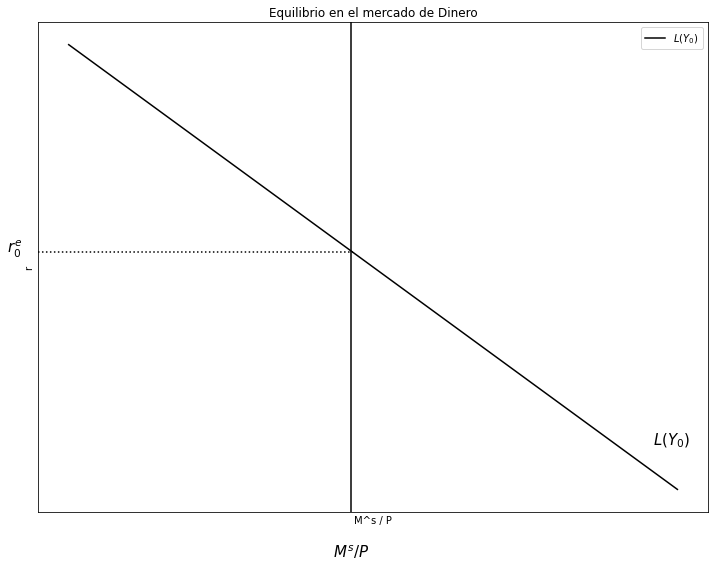

In [26]:
fig, ax1 = plt.subplots(figsize=(12, 9))

ax1.set(title="Equilibrio en el mercado de Dinero", xlabel=r'M^s / P', ylabel=r'r')


ax1.plot(MD_0, label= '$L(Y_0)$', color = 'Black')
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "Black")


ax1.axhline(y= 17.775, xmin= 0, xmax= 0.47, linestyle = ":", color = "black")


ax1.text(-10, 17.775, "$r^e_0$", fontsize = 15, color = 'Black')
ax1.text(43, 11, "$M^s / P$", fontsize = 15, color = 'Black')
ax1.text(95, 13.5, "$L(Y_0)$", fontsize = 15, color = 'Black')


ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

#### Explique y grafique qué sucede en el mercado de dinero si ∆$Y < 0$

In [17]:
k, j, MS0, P, Y = symbols('k j MS0 P Y')

f1 = -(1/j)*(MS0/P) + k*Y/j

df_Y = diff(f1, Y)
df_Y

k/j

$$\frac{∆r}{∆Y} = \frac{k}{j}$$
$$\frac{∆r}{(-)} = (+)$$
$$∆r < 0$$

Al decrecer $Y$, $Md$ también decrece, generándose que $Md < Ms$. Entonces, para mantener la igualdiad, $r$ también decrece para incrementar $Md$ y lograr nuevamente $Md = Ms$.

In [27]:
Y2 = 26

def MD1(k, j, P, r, Y):
    MD_eq1 = (k*Y - j*r)
    return MD_eq1
MD_1 = MD1(k, j, P, r, Y2)

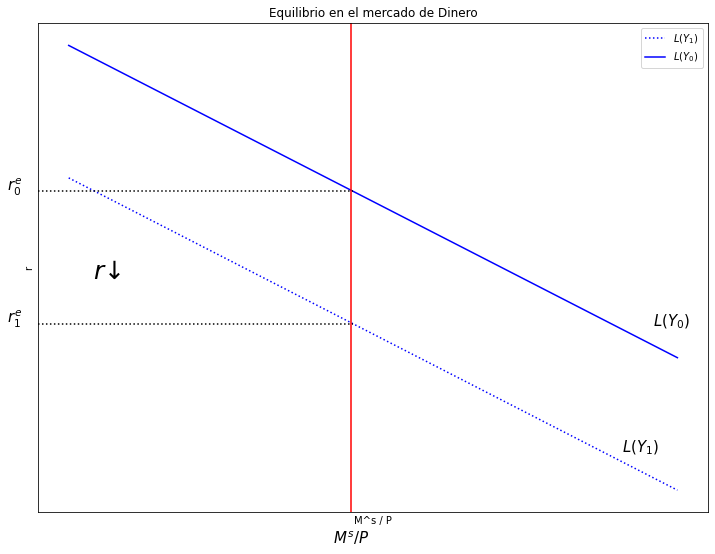

In [50]:
fig, ax1 = plt.subplots(figsize=(12, 9))

ax1.set(title="Equilibrio en el mercado de Dinero", xlabel=r'M^s / P', ylabel=r'r')

ax1.plot(MD_1, label= '$L(Y_1)$', linestyle = ":", color = 'Blue')
ax1.plot(MD_0, label= '$L(Y_0)$', color = 'Blue')
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "Red")


ax1.axhline(y= 17.775, xmin= 0, xmax= 0.47, linestyle = ":", color = "black")
ax1.axhline(y= 13.57, xmin= 0, xmax= 0.47, linestyle = ":", color = "black")


ax1.text(-10, 17.775, "$r^e_0$", fontsize = 15, color = 'Black')
ax1.text(-10, 13.57, "$r^e_1$", fontsize = 15, color = 'Black')

ax1.text(43, 6.6, "$M^s / P$", fontsize = 15, color = 'Black')

ax1.text(4, 15, "$r↓$", fontsize = 25, color = 'Black')

ax1.text(95, 13.5, "$L(Y_0)$", fontsize = 15, color = 'Black')
ax1.text(90, 9.5, "$L(Y_1)$", fontsize = 15, color = 'Black')


ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

#### Explique y grafique qué sucede en el mercado de dinero si ∆$k < 0$

In [51]:
k, j, MS0, P, Y = symbols('k j MS0 P Y')

f1 = -(1/j)*(MS0/P) + k*Y/j

df_k = diff(f1, k)
df_k

Y/j

$$\frac{∆r}{∆k} = \frac{Y}{j}$$
$$\frac{∆r}{(-)} = (+)$$
$$∆r < 0$$

Al decrecer $k$, $Md$ también decrece, generándose que $Md < Ms$. Entonces, para mantener la igualdiad, $r$ también decrece para incrementar $Md$ y lograr nuevamente $Md = Ms$.

In [71]:
k2 = 0.5

Tamañor = 100

k = 0.7
j = 0.1                
P  = 12 
Y = 32
MS_0 = 550

r = np.arange(Tamañor)

def MD2(k2, j, P, r, Y):
    MD_eq2 = (k2*Y - j*r)
    return MD_eq2
MD_2 = MD2(k2, j, P, r, Y)

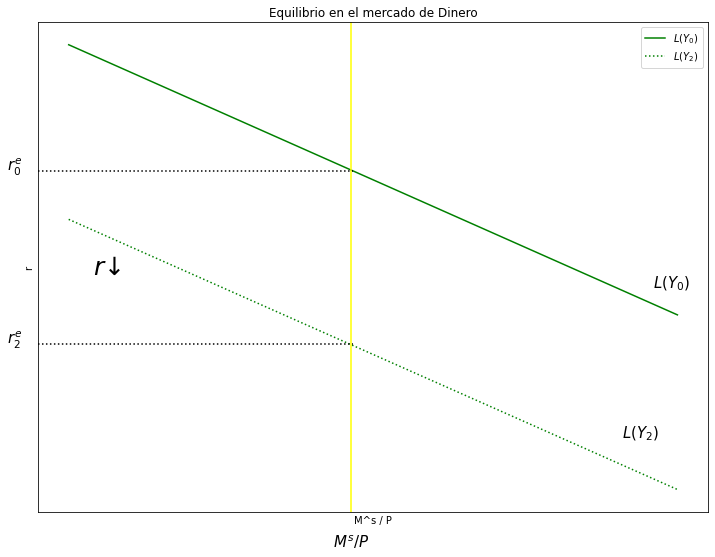

In [83]:
fig, ax1 = plt.subplots(figsize=(12, 9))

ax1.set(title="Equilibrio en el mercado de Dinero", xlabel=r'M^s / P', ylabel=r'r')


ax1.plot(MD_0, label= '$L(Y_0)$', color = 'Green')
ax1.plot(MD_2, label = '$L(Y_2)$', linestyle = ":", color = 'Green')
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "Yellow")


ax1.axhline(y= 17.775, xmin= 0, xmax= 0.47, linestyle = ":", color = "black")
ax1.axhline(y= 11.45, xmin= 0, xmax= 0.47, linestyle = ":", color = "black")


ax1.text(-10, 17.775, "$r^e_0$", fontsize = 15, color = 'Black')
ax1.text(-10, 11.45, "$r^e_2$", fontsize = 15, color = 'Black')
ax1.text(43, 4, "$M^s / P$", fontsize = 15, color = 'Black')


ax1.text(95, 13.5, "$L(Y_0)$", fontsize = 15, color = 'Black')
ax1.text(90, 8, "$L(Y_2)$", fontsize = 15, color = 'Black')

ax1.text(4, 14, "$r↓$", fontsize = 25, color = 'Black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

#### Explique y grafique qué sucede en el mercado de dinero si ∆$Ms < 0$

In [84]:
k, j, MS0, P, Y = symbols('k j MS0 P Y')

f1 = -(1/j)*(MS0/P) + k*Y/j

df_MS0 = diff(f1, MS0)
df_MS0

-1/(P*j)

$$\frac{∆r}{∆MS0} = -\frac{1}{Pj}$$
$$\frac{∆r}{(-)} = (-)$$
$$∆r > 0$$

Al decrecer $MS0$, $Ms$ también decrece, generándose que $Md > Ms$. Entonces, para mantener la igualdiad, $r$ incrementa para reducir $Md$ y lograr nuevamente $Md = Ms$.

In [90]:
Tamañor = 100

k = 0.7
j = 0.1                
P  = 12 
Y = 32
MS_0 = 550

r = np.arange(Tamañor)

MS_3 = 300

MS3 = MS_3 / P
MS3


25.0

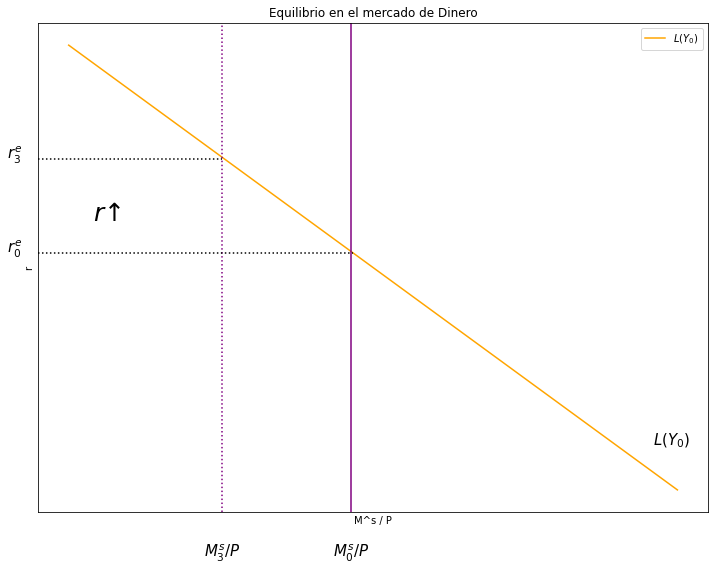

In [116]:
fig, ax1 = plt.subplots(figsize=(12, 9))

ax1.set(title="Equilibrio en el mercado de Dinero", xlabel=r'M^s / P', ylabel=r'r')


ax1.plot(MD_0, label= '$L(Y_0)$', color = 'Orange')
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "Purple")
ax1.axvline(x = MS3,  ymin= 0, ymax= 1, linestyle = ":", color = "Purple")


ax1.axhline(y= 17.775, xmin= 0, xmax= 0.47, linestyle = ":", color = "black")
ax1.axhline(y= 19.87, xmin= 0, xmax= 0.275, linestyle = ":", color = "black")

ax1.text(-10, 17.775, "$r^e_0$", fontsize = 15, color = 'Black')
ax1.text(-10, 19.87, "$r^e_3$", fontsize = 15, color = 'Black')

ax1.text(43, 11, "$M^s_0 / P$", fontsize = 15, color = 'Black')
ax1.text(22, 11, "$M^s_3 / P$", fontsize = 15, color = 'Black')

ax1.text(95, 13.5, "$L(Y_0)$", fontsize = 15, color = 'Black')

ax1.text(4, 18.5, "$r↑$", fontsize = 25, color = 'Black')


ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

### Curva LM

#### Derive paso a paso la curva LM matemáticamente (a partir del equilibrio en el Mercado Monetario) y grafique.

$$M^d = kY - jr$$
$$M^s = \frac{M^s_0}{P}$$

$Equilibrio:$

$$M^d = M^s$$

$$kY - jr = \frac{M^s_0}{P}$$
$$kY - \frac{M^s_0}{P} = jr$$

$Entonces...$
$$LM = r = - \frac{M^s_0}{Pj} + \frac{k}{j}Y$$

#### ¿Cuál es el efecto de una disminución en la Masa Monetaria ∆Ms < 0? Explica usando la intuición y gráficos.

$Recordar...$
$$M^d = M^s$$
$$kY - jr = \frac{M^s_0}{P}$$

Al decrecer $M^s_0$, $Ms$ también decrece, generándose que $Md > Ms$. Entonces, para mantener la igualdiad, $r$ incrementa para reducir $Md$ y lograr nuevamente $Md = Ms$.

In [131]:
TamañoY = 100

k = 0.3
j = 0.1                
Ms = 300             
P  = 15               

Y = np.arange(TamañoY)


def LM( k, j, Ms, P, Y):
    LM = (-Ms/P)/j + k/j*Y
    return LM

LM = LM( k, j, Ms, P, Y)

Ms2 = 100

def LM2( k, j, Ms2, P, Y):
    LM2 = (-Ms2/P)/j + k/j*Y
    return LM2

LM2 = LM2( k, j, Ms2, P, Y)

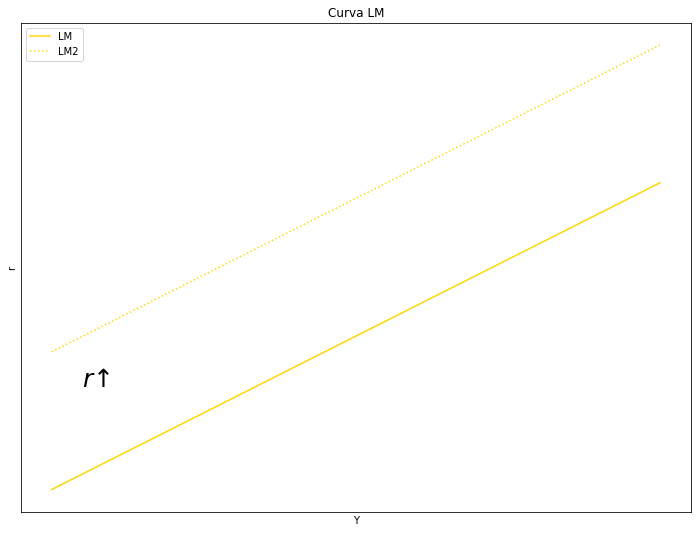

In [140]:
y_max = np.max(LM)
v = [0, TamañoY, 0, y_max]   
fig, ax = plt.subplots(figsize=(12, 9))

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

ax.plot(Y, LM, label="LM", color = 'Gold')
ax.plot(Y, LM2, label="LM2", linestyle = ":", color = 'Gold')

ax.set(title="Curva LM", xlabel=r'Y', ylabel=r'r')

ax.text(5, -100, "$r↑$", fontsize = 25, color = 'Black')

ax.legend()


plt.show()

#### ¿Cuál es el efecto de un aumento en k ∆k > 0? Explica usando la intuición y gráficos.

$Recordar...$
$$M^d = M^s$$
$$kY - jr = \frac{M^s_0}{P}$$

Al aumentar $k$, aumenta también $M^d$, por lo que queda $M^d > M^s$. Entonces, para mantener la igualdad, $r$ también incrementa para reducir a $M^d$ y volver a $M^d = M^s$

In [145]:
TamañoY = 100

k = 0.3
j = 0.1                
Ms = 300             
P  = 15               

Y = np.arange(TamañoY)

k3 = 0.6

def LM3( k3, j, Ms, P, Y):
    LM3 = (-Ms/P)/j + k3/j*Y
    return LM3

LM3 = LM3( k3, j, Ms, P, Y)

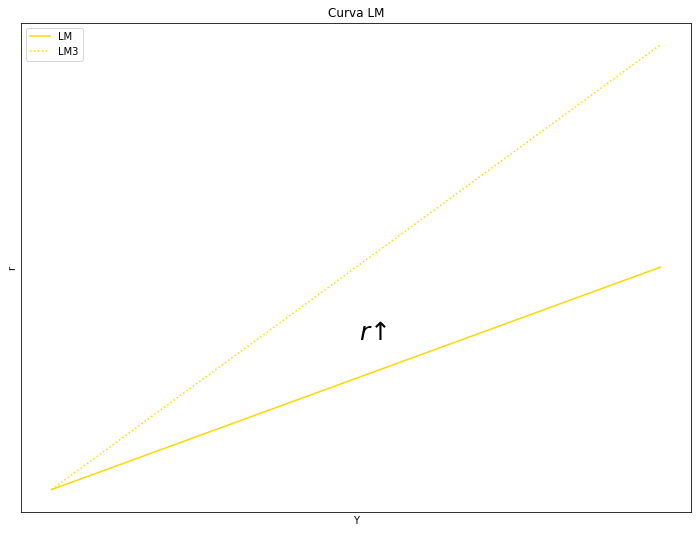

In [148]:
y_max = np.max(LM)
v = [0, TamañoY, 0, y_max]   
fig, ax = plt.subplots(figsize=(12, 9))

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

ax.plot(Y, LM, label="LM", color = 'Gold')
ax.plot(Y, LM3, label="LM3", linestyle = ":", color = 'Gold')

ax.set(title="Curva LM", xlabel=r'Y', ylabel=r'r')

ax.text(50, 0, "$r↑$", fontsize = 25, color = 'Black')

ax.legend()


plt.show()